In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('../data/cleaned_credit_score.csv')
print("Cleaned dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Cleaned dataset loaded successfully!
Shape: (100000, 28)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,16406,12320,3,84,308,10205,12,6011,1824.843333,3,...,3,12062,26.822620,180,1,49.574949,81513,3,312.494089,0
1,16417,12320,2,84,308,10205,12,6011,4194.170850,3,...,1,12062,31.944960,86,1,49.574949,7661,4,284.629162,0
2,16428,12320,6,84,0,10205,12,6011,4194.170850,3,...,1,12062,28.609352,184,1,49.574949,82226,5,331.209863,0
3,16441,12320,0,84,308,10205,12,6011,4194.170850,3,...,1,12062,31.377862,185,1,49.574949,30358,6,223.451310,0
4,16452,12320,7,84,308,10205,12,6011,1824.843333,3,...,1,12062,24.797347,186,1,49.574949,55363,2,341.489231,0


In [6]:
# Create some financial ratio features that often affect credit score

# 1 Credit Utilization Ratio (Outstanding Debt / Monthly Income)
df['Credit_Utilization'] = df['Outstanding_Debt'] / (df['Monthly_Inhand_Salary'] + 1)

#  Debt-to-Income Ratio (Outstanding Debt / Annual Income)
df['Debt_to_Income'] = df['Outstanding_Debt'] / (df['Annual_Income'] + 1)

#  Avg Payment Delay (combine two delay-related features)
df['Avg_Payment_Delay'] = (df['Delay_from_due_date'] + df['Num_of_Delayed_Payment']) / 2

#  Accounts Ratio (Num Bank Accounts / Num Credit Cards)
df['Accounts_Ratio'] = df['Num_Bank_Accounts'] / (df['Num_Credit_Card'] + 1)

print(" Feature Engineering completed!")
df.head()


 Feature Engineering completed!


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Utilization,Debt_to_Income,Avg_Payment_Delay,Accounts_Ratio
0,16406,12320,3,84,308,10205,12,6011,1824.843333,3,...,1,49.574949,81513,3,312.494089,0,6.606262,2.006321,344.0,0.6
1,16417,12320,2,84,308,10205,12,6011,4194.170850,3,...,1,49.574949,7661,4,284.629162,0,2.875211,2.006321,89.0,0.6
2,16428,12320,6,84,0,10205,12,6011,4194.170850,3,...,1,49.574949,82226,5,331.209863,0,2.875211,2.006321,344.0,0.6
3,16441,12320,0,84,308,10205,12,6011,4194.170850,3,...,1,49.574949,30358,6,223.451310,0,2.875211,2.006321,287.5,0.6
4,16452,12320,7,84,308,10205,12,6011,1824.843333,3,...,1,49.574949,55363,2,341.489231,0,6.606262,2.006321,92.5,0.6


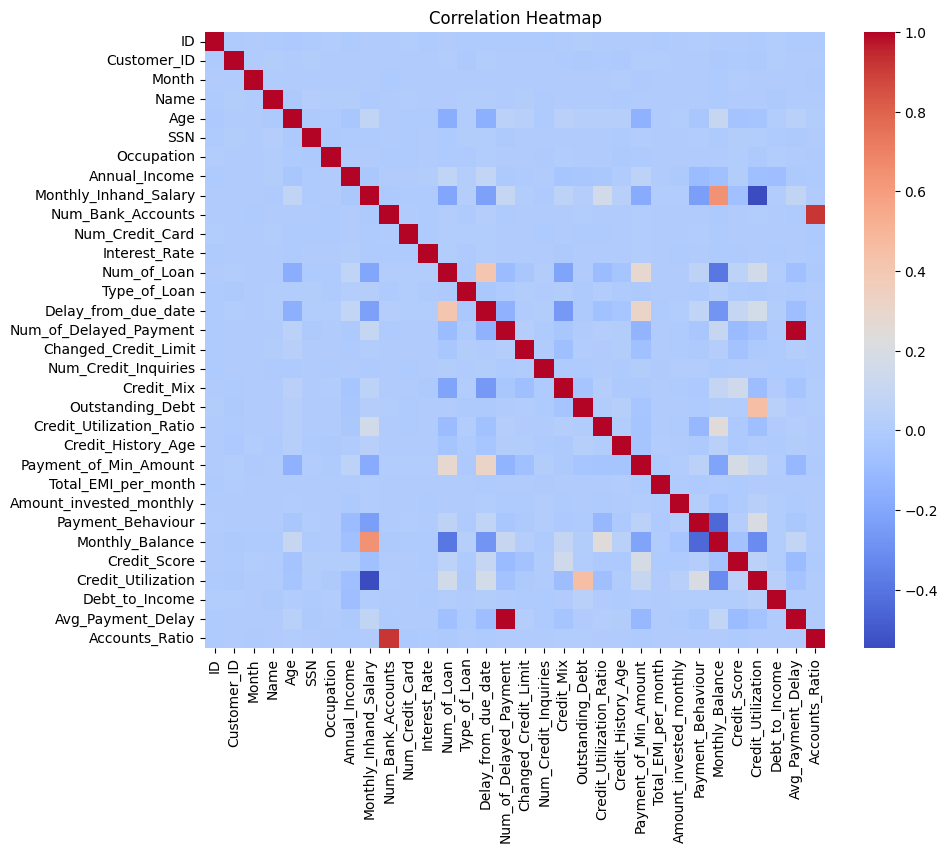

Credit_Score             1.000000
Payment_of_Min_Amount    0.179948
Credit_Mix               0.144913
Delay_from_due_date      0.097893
Num_of_Loan              0.055582
Credit_Utilization       0.050501
Payment_Behaviour        0.021692
SSN                      0.010684
Annual_Income            0.010598
Outstanding_Debt         0.008592
Name: Credit_Score, dtype: float64


In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Check which features are most related to Credit_Score
corr = df.corr()['Credit_Score'].sort_values(ascending=False)
print(corr.head(10))


In [8]:
X = df.drop('Credit_Score', axis=1)  # features
y = df['Credit_Score']               # target variable

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (80000, 31)
Test shape: (20000, 31)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Data scaled successfully!")


 Data scaled successfully!


In [10]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


🔹 Logistic Regression Accuracy: 0.59005
              precision    recall  f1-score   support

           0       0.50      0.30      0.37      3566
           1       0.62      0.40      0.49      5799
           2       0.60      0.79      0.68     10635

    accuracy                           0.59     20000
   macro avg       0.57      0.50      0.51     20000
weighted avg       0.59      0.59      0.57     20000



In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 0.7923
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      3566
           1       0.78      0.80      0.79      5799
           2       0.81      0.81      0.81     10635

    accuracy                           0.79     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000



In [12]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("🔹 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


c:\Users\Praveen\Desktop\CreditScorePrediction\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:35:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 XGBoost Accuracy: 0.766
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      3566
           1       0.77      0.74      0.75      5799
           2       0.78      0.80      0.79     10635

    accuracy                           0.77     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.77      0.77      0.77     20000



C:\Users\Praveen\AppData\Local\Temp\ipykernel_23464\895204558.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Set2')


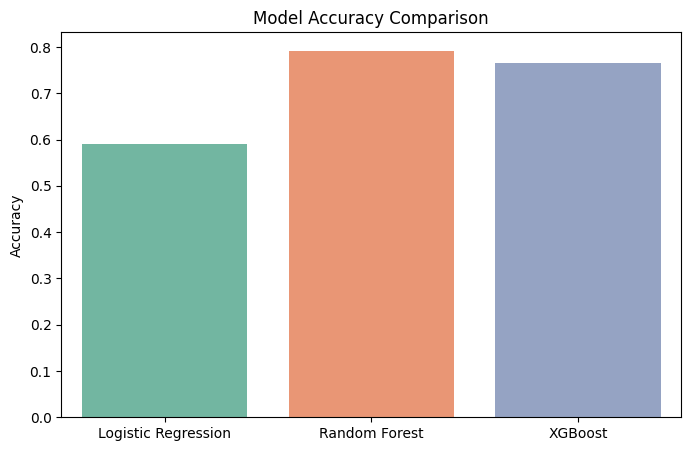

Logistic Regression: 0.5900
Random Forest: 0.7923
XGBoost: 0.7660


In [13]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb)
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

for m, a in zip(models, accuracies):
    print(f"{m}: {a:.4f}")
